In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df = pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
x = df.drop('species',axis=1)
y = df['species']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
for k in [1,2,3,4,5,6,7,8,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    predict_y = model.predict(x_test)
    print("For k=",k,"Accuracy is",accuracy_score(y_test,predict_y))
    print(confusion_matrix(y_test,predict_y))

For k= 1 Accuracy is 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
For k= 2 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
For k= 3 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
For k= 4 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
For k= 5 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
For k= 6 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
For k= 7 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
For k= 8 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
For k= 9 Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [16]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, title):
    pca = PCA(n_components=2)
    X_projected = pca.fit_transform(X)

    h = 0.02
    x_min, x_max = X_projected[:, 0].min() - 1, X_projected[:, 0].max() + 1
    y_min, y_max = X_projected[:, 1].min() - 1, X_projected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_original = pca.inverse_transform(mesh_points)
    Z = model.predict(mesh_original)
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


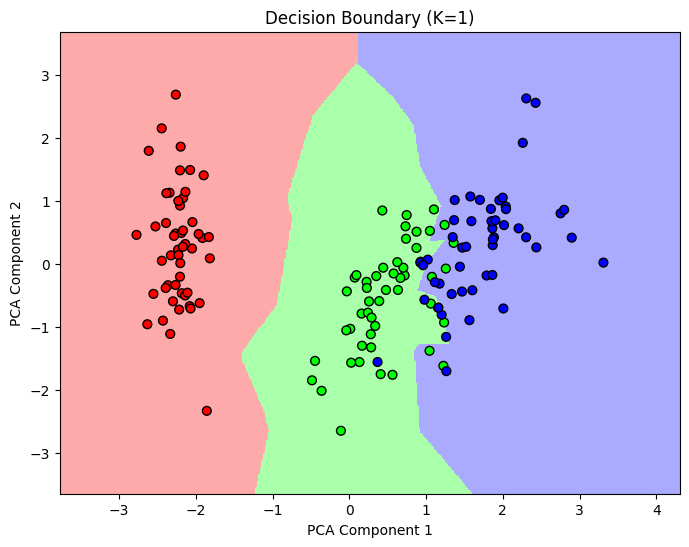

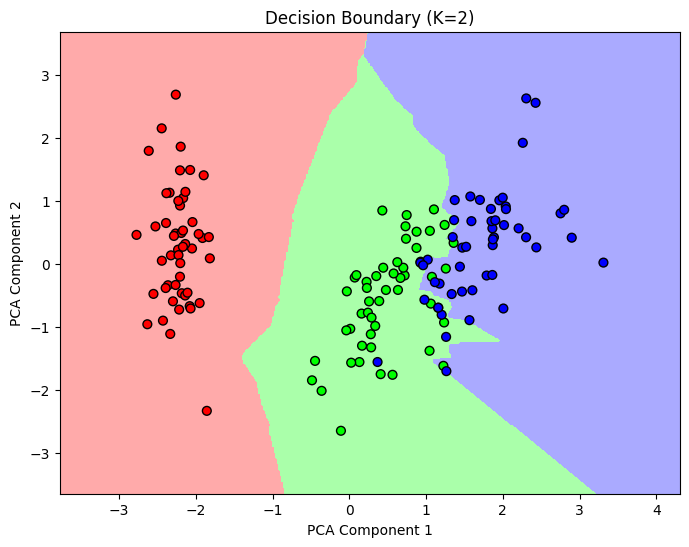

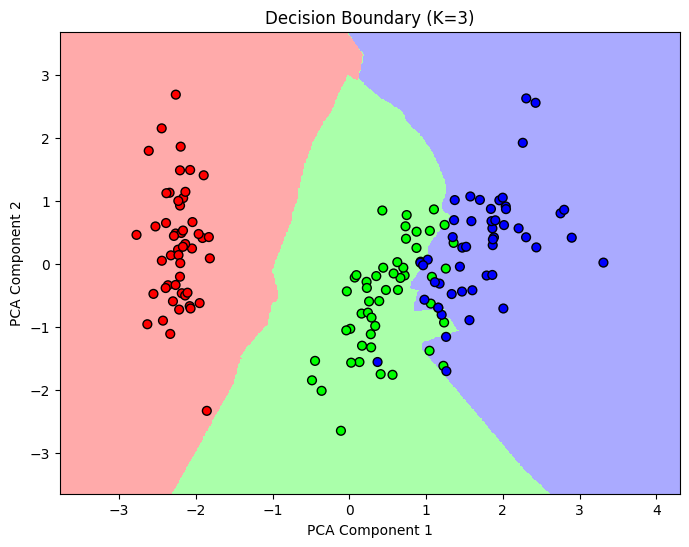

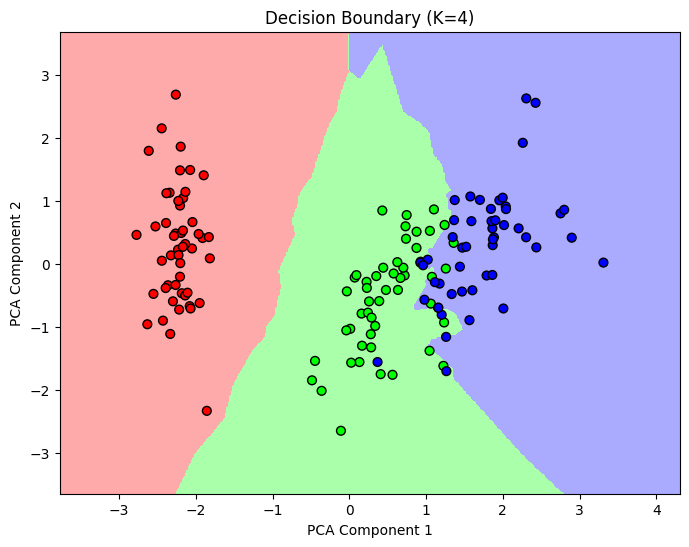

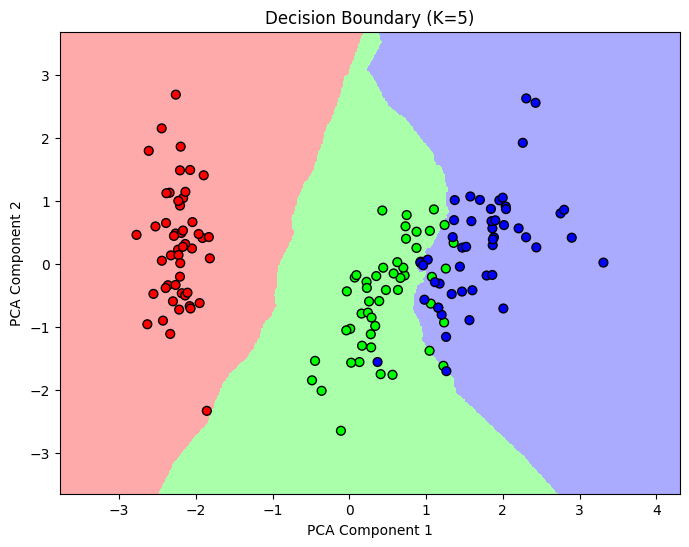

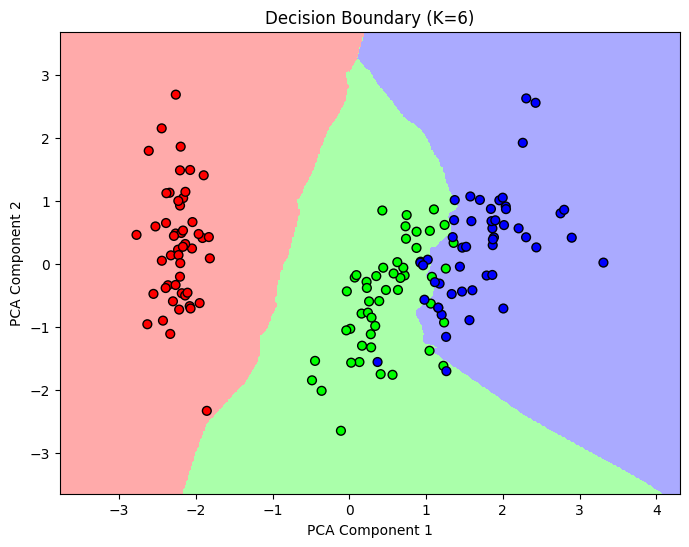

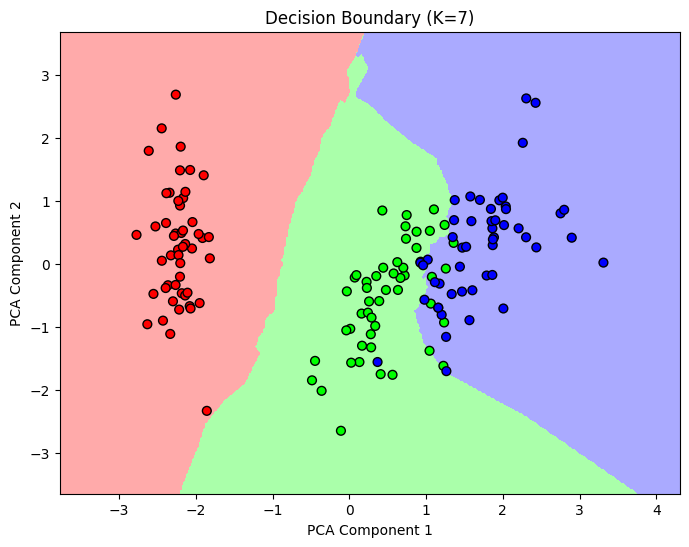

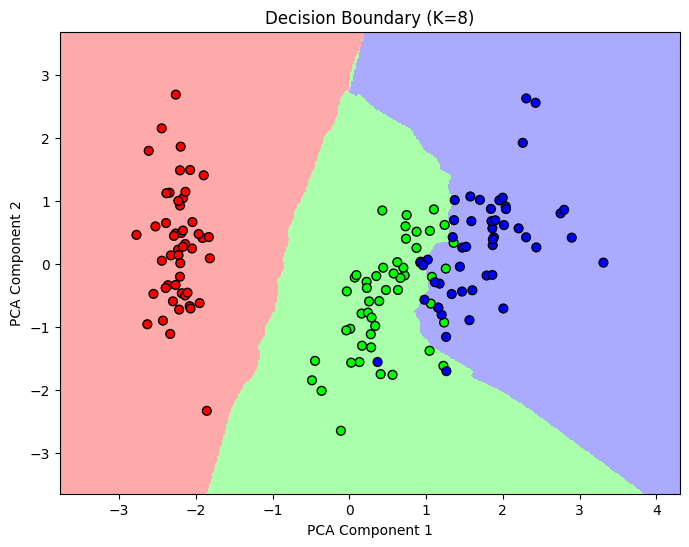

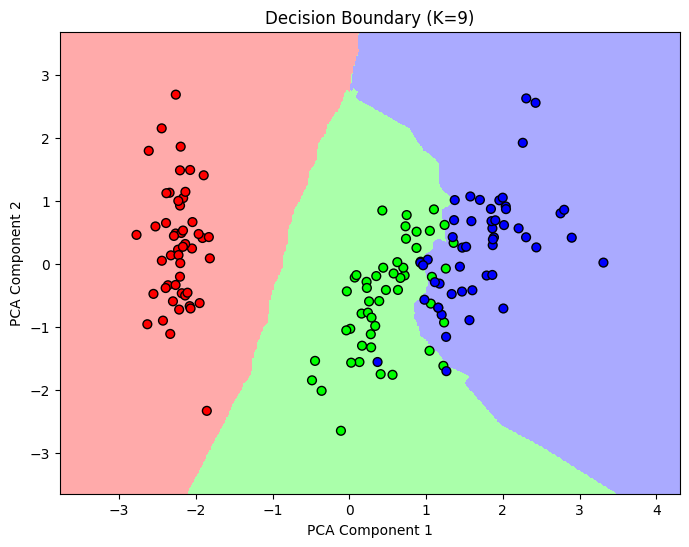

In [17]:
for k in [1,2,3,4,5,6,7,8,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    plot_decision_boundary(x, y, model, f"Decision Boundary (K={k})")
